############  Pose estimation  ###########

Pose estimation refers to computer vision techniques that detect persons or objects in images and video so that one could determine , for example, where someone’s elbow shown up in an image. Pose Estimation techniques have many applications such as Gesture Control, Action Recognition and also in the field of augmented reality. 
HPE localizes body key points to accurately recognize the postures of individuals given an image. These estimations are performed in either 3D or 2D

The main process of human pose estimation includes two basic steps:   i) localizing human body joints/key points 
ii) grouping those joints into valid human pose configuration

In the first step, the main focus is on finding the location of each key points of human beings. E.g. Head, shoulder, arm, hand, knee, ankle. 
The second step is grouping those joints into valid human pose configuration which determines the pairwise terms between body parts.

Media pipe is an open-source cross-platform framework for building multimodel machine learning pipelines. It can be used to implement cutting-edge models like human face detection, multi-hand tracking, hair segmentation, object detection and tracking, and so on.

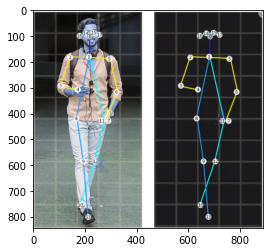

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
##path = "E:/Test/" # enter dataset path
img1=cv2.imread("HPE.png")
img2=cv2.imread("HPE2.png")
cv2.imshow("image",img1)
plt.imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
!pip install mediapipe

In [5]:
# pip install --upgrade "protobuf<=3.20.1"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


     -------------------------------------- 904.1/904.1 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3



tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.


In [4]:
import cv2
import mediapipe as mp  
mp_drawing = mp.solutions.drawing_utils # initialize Pose estimator
mp_pose = mp.solutions.pose


In [6]:
pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# create capture object
cap = cv2.VideoCapture('Duchenne Analysis.mp4')

while cap.isOpened():
    # read frame from capture object
    _, frame = cap.read()
        
#MediaPipe works with RGB images. But OpenCV reads images in BGR format.
#So using cv2.cvtColor() function we convert the frame to RGB format.
    try:
        # convert the frame to RGB format
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # process the RGB frame to get the result
        results = pose.process(RGB)

       # print(results.pose_landmarks)
       # draw detected skeleton on the frame
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # show the final output
        cv2.imshow('Output', frame)
    except:
        break
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()